In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# create time series data 

In [46]:
def func(value):
    return value*np.sin(value)/3 + 2* np.sin(5*value)

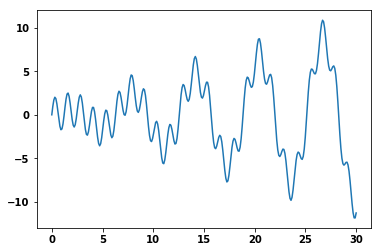

In [47]:
x = np.linspace(0,30,300).astype(np.float32)
y = x*np.sin(x)/3 + 2* np.sin(5*x)
plt.plot(x,y)

# RNN

In [49]:
tf.reset_default_graph()
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [70]:
learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_iterations = 1000
batch_size = 50
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = x[150:170].reshape(-1,20,1),func(x[150:170]+0.1).reshape(-1,20,1) # fetch the next training batch
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 	MSE: 9.1443815
100 	MSE: 0.008489142
200 	MSE: 3.918843e-05
300 	MSE: 6.7676324e-06
400 	MSE: 7.448393e-07
500 	MSE: 5.420636e-08
600 	MSE: 2.7735427e-09
700 	MSE: 1.0450556e-10
800 	MSE: 3.066205e-11
900 	MSE: 2.3185862e-10


INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


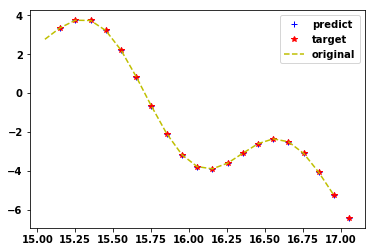

In [71]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    y_pre=sess.run(outputs, feed_dict={X:  x[150:170].reshape(-1,20,1)})
    plt.plot(x[150:170]+0.1,y_pre.reshape(20),'b+',label='predict')
    plt.plot(x[150:170]+0.1,func(x[150:170]+0.1),'r*',label='target')
    plt.plot(x[150:170],func(x[150:170]),'y--',label='original')
    plt.legend()
    plt.show()